In [8]:
import tensorflow as tf
import numpy as np

batch归一化

In [ ]:
h1=tf.contrib.layers.fully_connected(x,100,activation_fn=None,scope='bn')
h2=tf.contrib.layers.batch_norm(h1,center=True,scale=True,is_training=phase,scope='bn')

# 建立神经网络
## 1.准备数据

In [9]:
x_data=np.linspace(-1,1,300).reshape(-1,1)
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise

## 2. 建立一个层

In [6]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    weights=tf.Variable(tf.random_normal((in_size,out_size)))
    biases=tf.Variable(tf.zeros(shape=(1,out_size))+0.1) #因为bias初始最好不为0
    wx_plus_b=tf.matmul(inputs,weights)+biases
    if activation_function is None:
        outputs=wx_plus_b
    else:
        outputs=activation_function(wx_plus_b)
    return outputs

## 3. 建立所有层

In [7]:
xs=tf.placeholder(shape=(None,1),dtype=tf.float32)
ys=tf.placeholder(shape=(None,1),dtype=tf.float32)
layer_1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(layer_1,10,1,activation_function=None)

## 3.损失函数

In [8]:
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

## 4. 训练

In [9]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

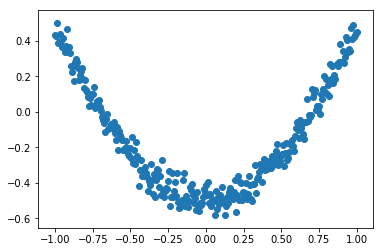

0.196167
0.0120932
0.00790618
0.00752522
0.00719032
0.00663895
0.00608449
0.00562756
0.00534235
0.00515861
0.00499764
0.00486557
0.00476097
0.00466958
0.00458892
0.00451697
0.00444158
0.00435402
0.00427093
0.00419756


In [10]:
#(暂时没找到jupyter画动画的方法，建议用pycharm之类)
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        y_predict=sess.run(prediction,feed_dict={xs:x_data})
        lines=ax.plot(x_data,y_predict,'r-',lw=5)
        plt.pause(0.1)

# 可视化整个网络

In [1]:
import tensorflow as tf
with tf.name_scope('inputs'): # 'inputs'是一层的名字
    xs=tf.placeholder(shape=(None,1),dtype=tf.float32,name='x_input') # 'x_input'也是图里的名字
    ys=tf.placeholder(shape=(None,1),dtype=tf.float32,name='y_input')


def add_layer(inputs,in_size,out_size,activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            weights=tf.Variable(tf.random_normal((in_size,out_size)),name='W')
        with tf.name_scope('biases'):
            biases=tf.Variable(tf.zeros(shape=(1,out_size))+0.1,name='b') #因为bias初始最好不为0
        with tf.name_scope('wx_plus_b'):
            wx_plus_b=tf.matmul(inputs,weights)+biases
    if activation_function is None:
        outputs=wx_plus_b
    else:
        outputs=activation_function(wx_plus_b) #不用给name，因为会自动给出
    return outputs

In [2]:
layer_1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(layer_1,10,1,activation_function=None)

In [3]:
with tf.name_scope('loss'):
    loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1])) #也可以加name
with tf.name_scope('train'):
    train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)    

In [10]:
sess=tf.Session()
writer=tf.summary.FileWriter('file/',sess.graph) #logs文件夹

sess.run(tf.global_variables_initializer())
sess.run(prediction,feed_dict={xs:x_data})
writer.close()

In [ ]:
#$ tensorboard --logdir='test/'

# 过拟合
cost Function加上L1 正则化或L2正则化  
其中L1正则化可以将某些参数变成0，从而使参数系数。  
L2不会使参数系数  
(原因参见lasso和ridge regression)


In [ ]:
loss=tf.reduce_mean(tf.square(y_-y))+tf.contrib.layers.l2_regularizer(alpha)(w)

# 滑动平均

#### 1. 定义变量及滑动平均类

In [3]:
import tensorflow as tf
v1 = tf.Variable(0, dtype=tf.float32)
step = tf.Variable(0, trainable=False)
ema = tf.train.ExponentialMovingAverage(0.99, step)
maintain_averages_op = ema.apply([v1]) 

#### 2. 查看不同迭代中变量取值的变化。
$\min (decay,\dfrac{1+num_{updates}}{10+num_{updates}})$
一般情况下，decay设定为一个非常接近1的数

In [4]:
with tf.Session() as sess:
    
    # 初始化
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print (sess.run([v1, ema.average(v1)]))
    
    # 更新变量v1的取值
    sess.run(tf.assign(v1, 5))
    sess.run(maintain_averages_op)#decay=0.1
    print (sess.run([v1, ema.average(v1)])) #0.1*0+0.9*5=4.5
    
    # 更新step和v1的取值
    sess.run(tf.assign(step, 10000))  
    sess.run(tf.assign(v1, 10))
    sess.run(maintain_averages_op)#decay=0.99
    print (sess.run([v1, ema.average(v1)]) )      
    
    # 更新一次v1的滑动平均值
    sess.run(maintain_averages_op)
    print (sess.run([v1, ema.average(v1)])) 


[0.0, 0.0]
[5.0, 4.5]
[10.0, 4.5549998]
[10.0, 4.6094499]


# 正则化

- 加入collection

In [ ]:
weight_loss=tf.multiply(tf.nn.l2_loss(var),wl,name='weight_loss')#wl是L2_loss的系数
tf.add_to_collection('losses',weight_loss)#加入一个collection

- 正则化的和

In [ ]:
tf.add_n(tf.get_collection('losses'),name='total_loss')

把entropy也加入'losses'使代码简洁一些

In [ ]:
tf.add_to_collection('losses',cross_entropy)
tf.add_n(tf.get_collection('losses'),name='total_loss')